# Linear Regression

This section seeks to explore the linear relationships and statistical significance between different traffic variables.

## Speed ~ Weekday, Flow, Occupancy

$$
    speed_t = \beta_0 + \delta_1 \cdot weekday + \beta_1 \cdot flow_t + \beta_2 \cdot occ_t + u_t,
$$
where $weekday$ is a dummy variable indicating whether there it is a weekday, and the variables are control variables.

Check one station, at one time first.

### Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("../data/I88N-processed/concat/concat.csv")

In [3]:
data.head(3)

,Unnamed: 0,Station ID,datetime,Occupancy,Flow,Speed,Date,Time,idx
0,0,408907,2017-01-01 00:00:00,2.1,95.0,68.8,2017-01-01,00:00:00,0
1,1,408907,2017-01-01 00:05:00,2.0,91.0,68.4,2017-01-01,00:05:00,1
2,2,408907,2017-01-01 00:10:00,2.0,91.0,68.4,2017-01-01,00:10:00,2


In [4]:
station_ids = data['Station ID'].unique().tolist()

In [5]:
station_id = station_ids[np.random.choice(101)]
sample_data = data.loc[data['Station ID'] == station_id]
sample_data = sample_data.loc[(sample_data['Time'] == '08:30:00') | (sample_data['Time'] == '08:30')]

Construct the response variable and explanatory variables.

In [6]:
speed = sample_data['Speed'].values.tolist()
flow = sample_data['Flow'].values.tolist()
occ = sample_data['Occupancy'].values.tolist()

Label weekday and weekend.

In [7]:
dates = sample_data['Date'].values.tolist()

In [8]:
import datetime as dt

In [9]:
def date_to_day(date):
    # date: a date string in the format of "yyyy-mm-dd"
    # return: an int w/t Monday being 0 and Sunday being 6.
    if date.find('-') != -1:
        y, m, d = date.split('-')
    else:
        m, d, y = date.split('/')
    return dt.datetime(int(y), int(m), int(d)).weekday()

In [10]:
days = list(map(date_to_day, dates))
weekday = [0 if (day == 5 or day == 6) else 1 for day in days]

## Regression - Model Fitting

In [11]:
import statsmodels.api as sm

In [12]:
X = pd.DataFrame({
    'weekday': weekday,
    'flow': flow,
    'occ': occ
})
X = sm.add_constant(X)
Y = pd.DataFrame({
    'speed': speed
})

In [13]:
model = sm.OLS(Y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     1090.
Date:                Fri, 22 Mar 2019   Prob (F-statistic):          8.35e-177
Time:                        00:16:28   Log-Likelihood:                -1145.7
No. Observations:                 353   AIC:                             2299.
Df Residuals:                     349   BIC:                             2315.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         68.9320      1.739     39.645      0.0

## Visualization

In [14]:
import matplotlib.pyplot as plt

### Speed vs. Flow

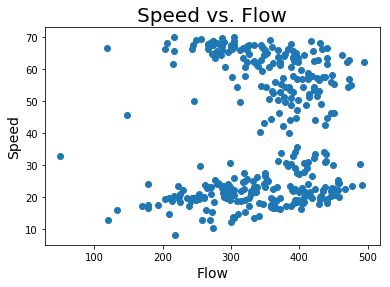

In [15]:
plt.scatter(X['flow'], Y['speed'])
plt.title('Speed vs. Flow', fontsize=20)
plt.xlabel('Flow', fontsize=14)
plt.ylabel('Speed', fontsize=14)
plt.show()

### Speed vs. Occupancy

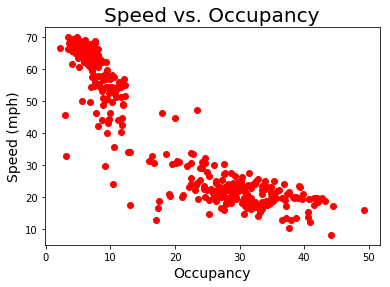

In [16]:
plt.scatter(X['occ'], Y['speed'], color='red')
plt.title('Speed vs. Occupancy', fontsize=20)
plt.xlabel('Occupancy', fontsize=14)
plt.ylabel('Speed (mph)', fontsize=14)
plt.show()

### Speed vs. Weekday

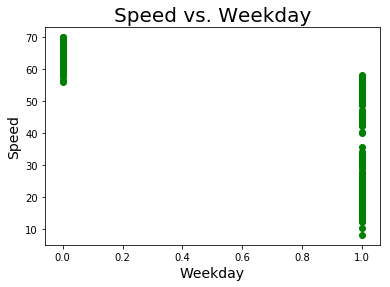

In [17]:
plt.scatter(X['weekday'], Y['speed'], color='green')
plt.title('Speed vs. Weekday', fontsize=20)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Speed', fontsize=14)
plt.show()

In [18]:
sum(X['weekday'] == 0), sum(X['weekday'] == 1)

(104, 249)

### Flow vs. Weekday

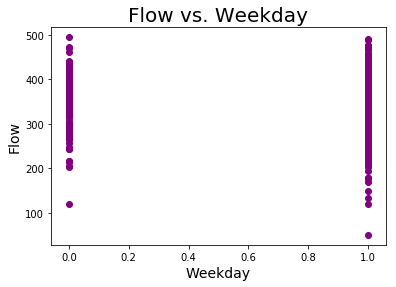

In [19]:
plt.scatter(X['weekday'], X['flow'], color='purple')
plt.title('Flow vs. Weekday', fontsize=20)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Flow', fontsize=14)
plt.show()

### Occupancy vs. Weekday

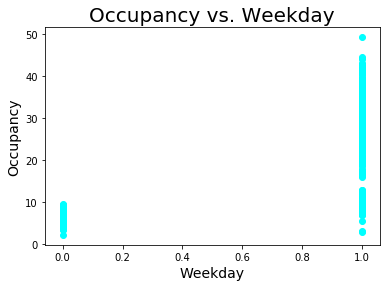

In [20]:
plt.scatter(X['weekday'], X['occ'], color='cyan')
plt.title('Occupancy vs. Weekday', fontsize=20)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Occupancy', fontsize=14)
plt.show()

### Histogram: Approximating Distribution

In [21]:
weekend_Y = Y.loc[X['weekday'] == 0]
weekend_speed = weekend_Y['speed'].values

In [22]:
weekday_Y = Y.loc[X['weekday'] == 1]
weekday_speed = weekday_Y['speed'].values

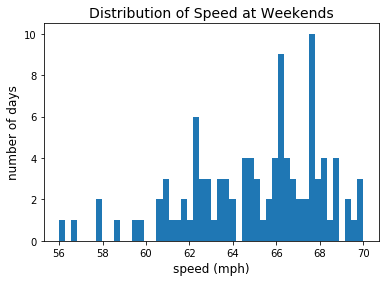

In [23]:
# plot histogram for weekends
plt.hist(weekend_speed, bins=50)
plt.title(r'Distribution of Speed at Weekends', fontsize=14)
plt.xlabel(r'speed (mph)', fontsize=12)
plt.ylabel(r'number of days', fontsize=12)
plt.show()

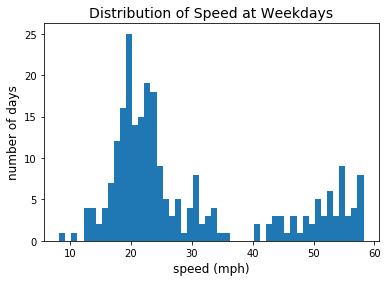

In [24]:
# plot histogram for weekdays
plt.hist(weekday_speed, bins=50)
plt.title(r'Distribution of Speed at Weekdays', fontsize=14)
plt.xlabel(r'speed (mph)', fontsize=12)
plt.ylabel(r'number of days', fontsize=12)
plt.show()

# Speed ~ Weekday

In [25]:
X_2 = X[['const', 'weekday']]

In [26]:
model_2 = sm.OLS(Y, X_2).fit()
summary_2 = model_2.summary()
print(summary_2)

                            OLS Regression Results                            
Dep. Variable:                  speed   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     697.6
Date:                Fri, 22 Mar 2019   Prob (F-statistic):           1.99e-85
Time:                        00:16:30   Log-Likelihood:                -1365.3
No. Observations:                 353   AIC:                             2735.
Df Residuals:                     351   BIC:                             2742.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.9885      1.138     57.098      0.0

In [27]:
X_2_pred = model_2.predict(X_2)

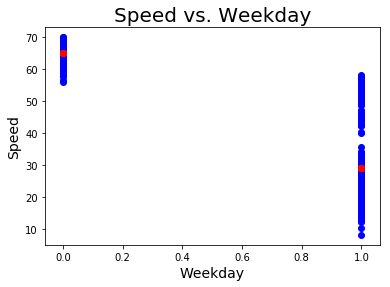

In [28]:
plt.scatter(X_2['weekday'], Y['speed'], color='blue')
plt.scatter(X_2['weekday'], X_2_pred.values, color='red')
plt.title('Speed vs. Weekday', fontsize=20)
plt.xlabel('Weekday', fontsize=14)
plt.ylabel('Speed', fontsize=14)
plt.show()

$\textit{Remark}$.  The above regression is in fact equivalent to grouping and taking the means of each group.